# HOMEWORK - DATA PREPROCESSING
## FINAL PROJECT - STAGE 1

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


In [731]:
df = pd.read_csv('train.csv', delimiter=';')

In [732]:
df.sample(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26089,53,management,married,tertiary,no,32464,no,no,cellular,19,nov,135,4,-1,0,unknown,no
19503,34,technician,single,secondary,no,60,no,no,cellular,7,aug,274,2,-1,0,unknown,no
34583,47,blue-collar,married,primary,no,-301,yes,no,cellular,5,may,277,1,-1,0,unknown,no
14806,35,management,married,tertiary,no,-273,yes,no,cellular,16,jul,344,3,-1,0,unknown,no
27684,38,services,divorced,secondary,no,8554,yes,no,cellular,21,nov,29,2,176,4,other,no
10778,55,technician,married,primary,no,1498,no,yes,unknown,17,jun,345,2,-1,0,unknown,no
41813,30,admin.,married,secondary,no,0,no,no,cellular,15,oct,86,1,140,3,failure,no
11390,50,blue-collar,divorced,primary,no,-232,yes,no,unknown,19,jun,168,1,-1,0,unknown,no
31162,54,blue-collar,married,primary,no,258,no,no,telephone,26,feb,29,1,-1,0,unknown,no
31972,30,blue-collar,single,primary,no,464,yes,no,cellular,13,apr,686,1,-1,0,unknown,no


In [733]:
##karena ada nilai negatif di kolom balance, kita akan jadikan nilai di kolom balance menjadi positif semua
## asumsi human error salah input
df['balance'] = df['balance'].abs()
df.sample(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
17185,55,entrepreneur,married,secondary,no,814,no,yes,cellular,28,jul,69,12,-1,0,unknown,no
13479,36,technician,married,secondary,no,264,yes,yes,cellular,9,jul,482,1,-1,0,unknown,no
1053,50,blue-collar,married,secondary,no,1557,yes,no,unknown,7,may,263,6,-1,0,unknown,no
43808,47,services,divorced,unknown,no,973,no,no,cellular,27,may,489,1,479,1,failure,yes
36452,37,blue-collar,single,secondary,no,133,yes,no,cellular,11,may,1388,2,-1,0,unknown,yes
31713,50,services,single,secondary,no,1716,yes,no,cellular,7,apr,272,1,-1,0,unknown,no
7366,24,student,single,secondary,no,2530,yes,no,unknown,29,may,399,5,-1,0,unknown,no
43031,32,management,married,tertiary,no,905,no,no,cellular,12,feb,666,4,-1,0,unknown,yes
34838,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure,no
24406,45,technician,single,secondary,no,1171,yes,no,cellular,17,nov,34,1,-1,0,unknown,no


In [734]:
## kita cek apakah proses menjadi nilai absolut berhasil

cek_abs = df[(df['balance'] < 0) & (df['default'] == 'no') & (df['housing'] == 'no') & (df['loan'] == 'no')]
cek_abs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [735]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1415.196081,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3020.529906,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,137.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,485.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1436.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [737]:
print(df.describe(include='all'))

                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1415.196081   
std        10.618762          NaN      NaN        NaN     NaN    3020.529906   
min        18.000000          NaN      NaN        NaN     NaN       0.000000   
25%        33.000000          NaN      NaN        NaN     NaN     137.000000   
50%        39.000000          NaN      NaN        NaN     NaN     485.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1436.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

In [738]:
## cek apakah ada nilai yang dirasa bermasalah di kolom kategorikal.
## cek apa ada yang salah ketik (misspellings, incongruent naming conventions, improper capitalization, incorrect word use, etc.)

unique_values = {}
columns_of_interest = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for column in columns_of_interest:
    unique_values[column] = df[column].unique()

unique_values

{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [739]:
## hapus nilai unknown pada kolom contact karena asumsinya adalah tidak ada opsi pilihan lain di real case untuk marketing telfon selain telfon rumah dan telfon selular, jadi data tersebut adalah invalid

df = df[df['contact'] != 'unknown']

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32191 entries, 12657 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        32191 non-null  int64 
 1   job        32191 non-null  object
 2   marital    32191 non-null  object
 3   education  32191 non-null  object
 4   default    32191 non-null  object
 5   balance    32191 non-null  int64 
 6   housing    32191 non-null  object
 7   loan       32191 non-null  object
 8   contact    32191 non-null  object
 9   day        32191 non-null  int64 
 10  month      32191 non-null  object
 11  duration   32191 non-null  int64 
 12  campaign   32191 non-null  int64 
 13  pdays      32191 non-null  int64 
 14  previous   32191 non-null  int64 
 15  poutcome   32191 non-null  object
 16  y          32191 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


Handling Missing Value

In [741]:
## cek apa ada nilai null

null_values = df.isnull().sum()
null_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [742]:
#Menghapus baris yang memiliki nilai kosong(NULL)
df.dropna(axis=0)
#Menghapus kolom yang memiliki nilai kosong(NULL)
df.dropna(axis=1)

#Handling Unknown value
## kita replace nilai unknown menjadi other agar lebih mudah dipahami
## untuk nilai unknown di kolom poutcome kita ubah juga ke nilai other karena asumsi kita unknown dan other adalah sama
df["education"] = df["education"].replace({"unknown": "other"})
df["poutcome"] = df["poutcome"].replace({"unknown": "other"})
df["job"] = df["job"].replace({"unknown": "other"})

In [743]:
df.sample(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15080,27,housemaid,married,secondary,yes,65,yes,yes,cellular,17,jul,59,1,-1,0,other,no
15485,43,management,single,tertiary,no,50,yes,yes,cellular,18,jul,30,2,-1,0,other,no
24485,58,management,divorced,secondary,no,321,no,yes,cellular,17,nov,254,2,-1,0,other,no
34370,33,management,married,tertiary,no,0,yes,no,telephone,4,may,33,7,-1,0,other,no
43575,32,admin.,married,tertiary,no,284,yes,no,cellular,29,apr,717,3,-1,0,other,yes
27446,43,technician,married,primary,no,201,no,no,cellular,21,nov,69,2,-1,0,other,no
15828,30,management,married,tertiary,no,74,yes,no,cellular,21,jul,106,3,-1,0,other,no
32428,34,technician,married,tertiary,no,1524,yes,no,cellular,16,apr,399,1,-1,0,other,no
21428,35,management,single,tertiary,no,0,no,no,cellular,18,aug,276,5,-1,0,other,no
14043,39,technician,married,secondary,no,37,yes,yes,cellular,11,jul,467,1,-1,0,other,no


Handle Duplicates Data

In [744]:
df = df.drop_duplicates()

Handle Outlier

<Figure size 1200x800 with 0 Axes>

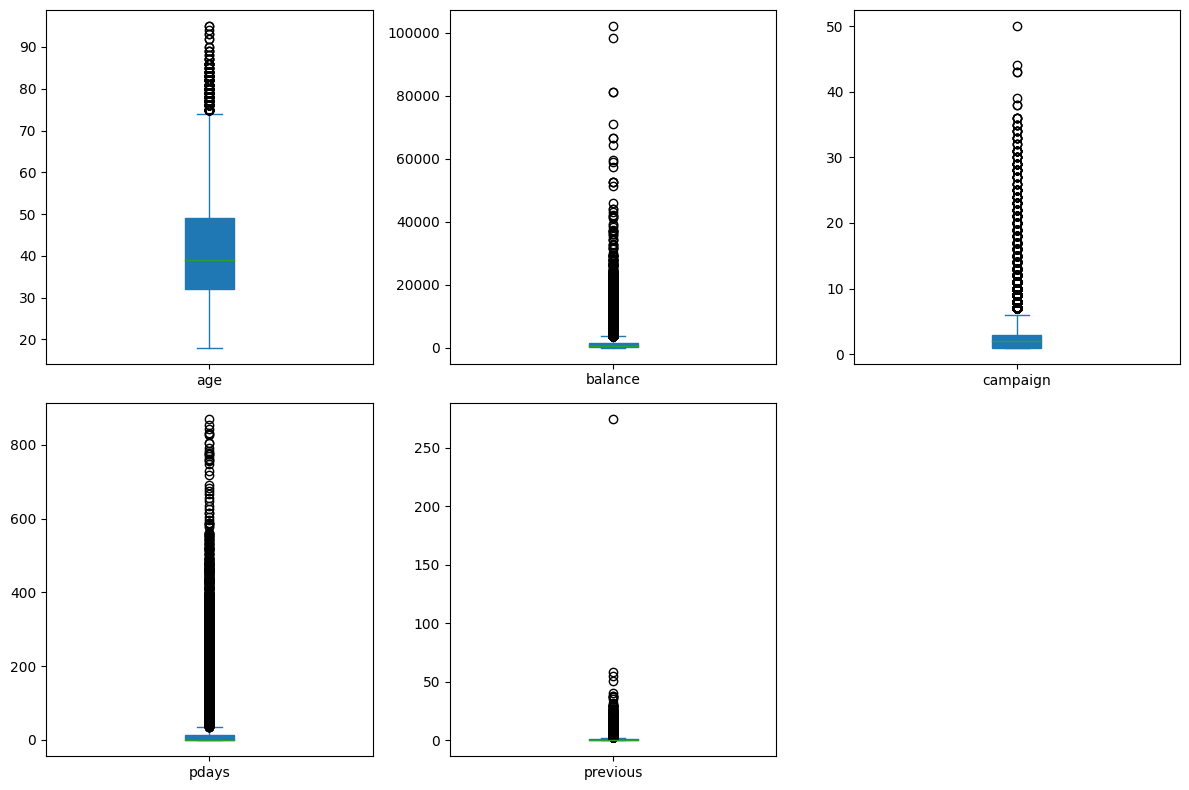

In [745]:
## kita cek dulu seperti apa nilai outlier pada data

plt.figure(figsize=(12, 8))

columns = ['age', 'balance', 'campaign', 'pdays', 'previous']

df[columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), patch_artist=True)

plt.tight_layout()
plt.show()

##Exploratory Data Analysis

<h4>Univariate Analysis</h4>

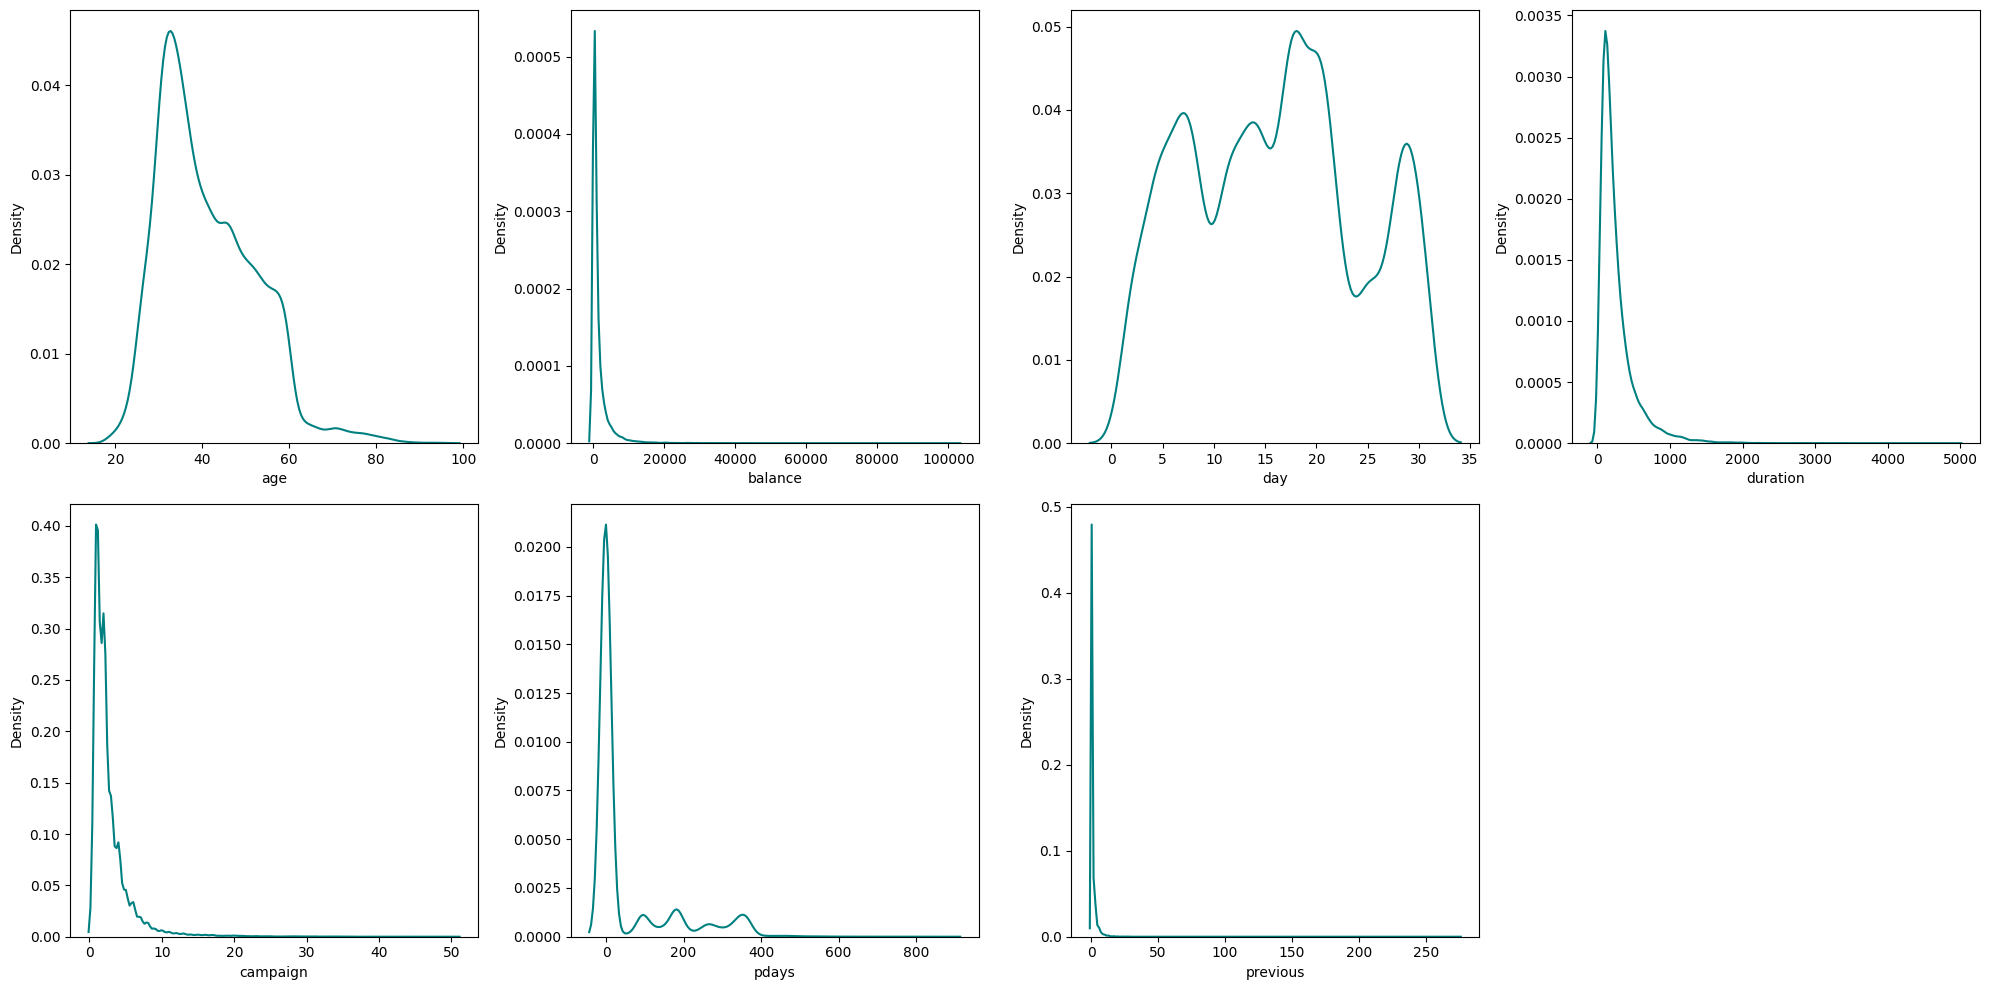

In [746]:
numericals = df.select_dtypes(include='number').columns.tolist()
features = numericals

num_plots = len(features)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 5, num_rows * 5))
for i in range(0, num_plots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(x=df[features[i]], color='teal')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

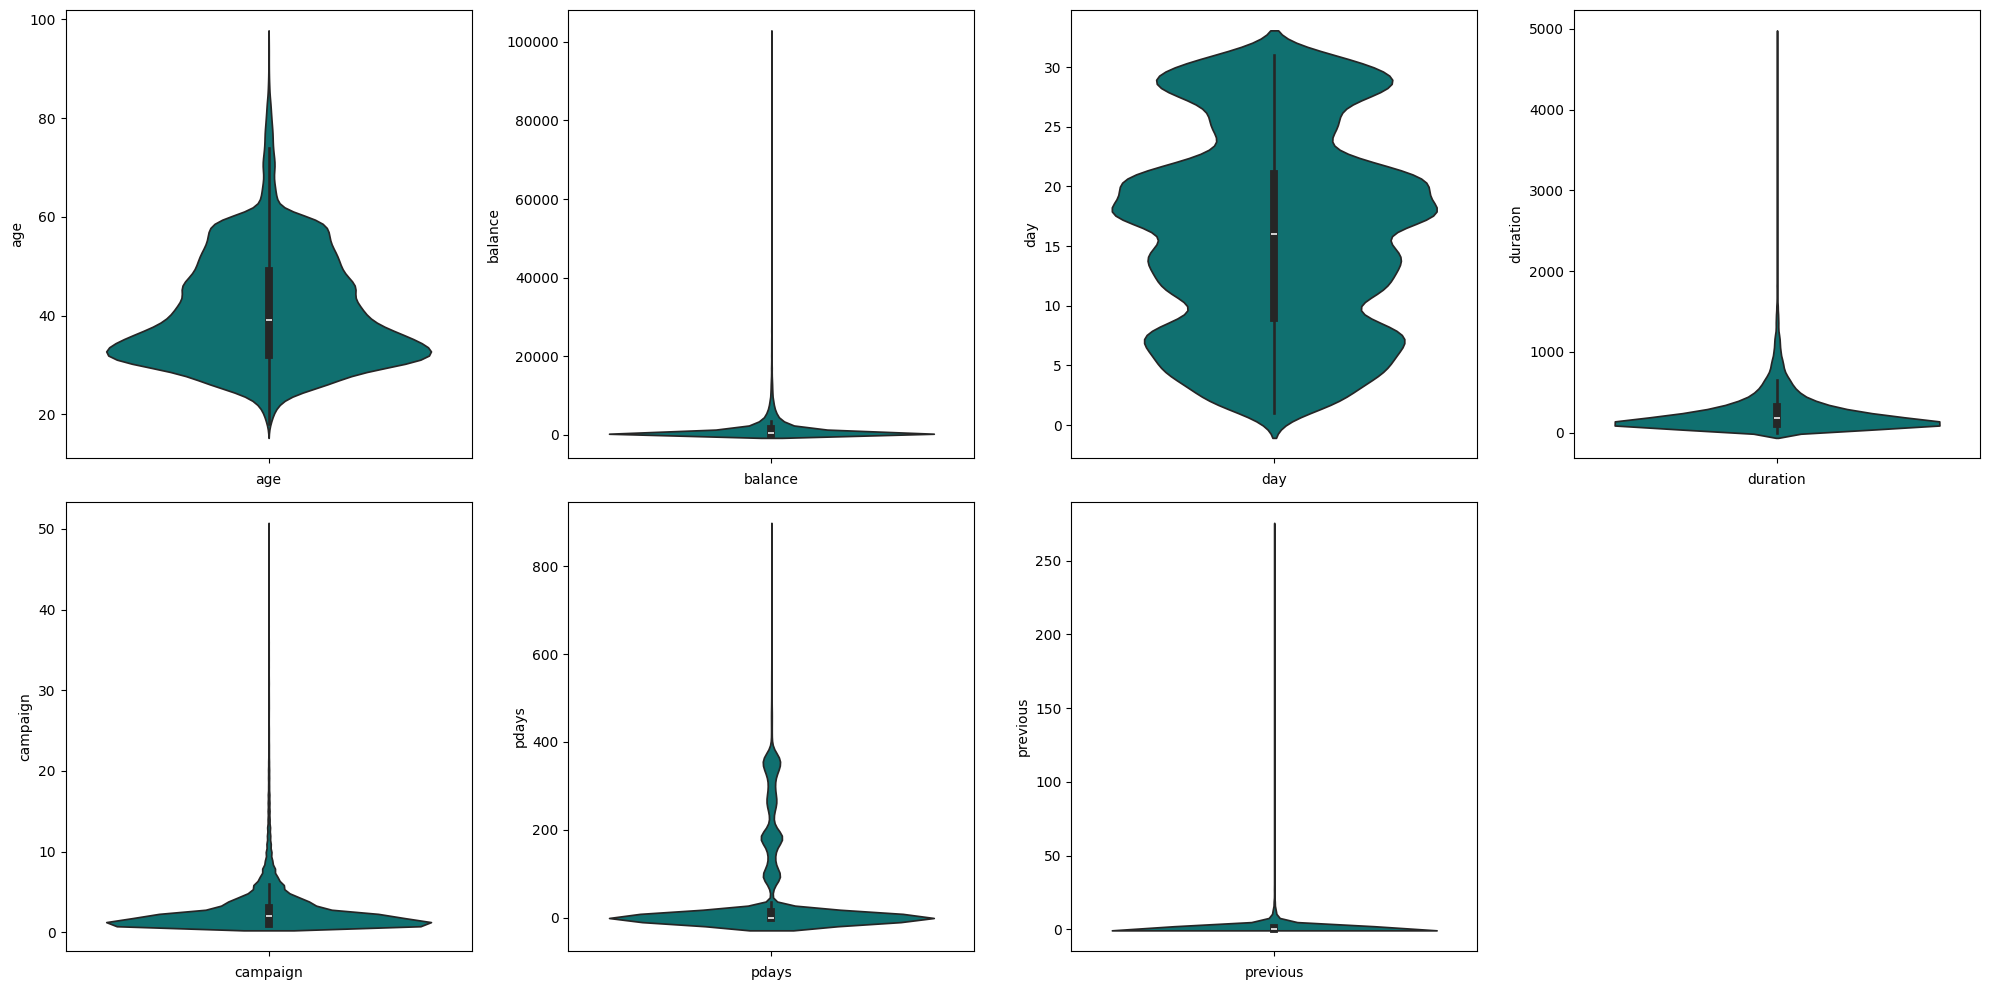

In [747]:
features = numericals

num_plots = len(features)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 5, num_rows * 5))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(y=df[features[i]], color='teal')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

In [748]:
df['y'] = np.where(df['y']=='yes',1,0)

In [749]:
df['y'].value_counts()

y
0    27432
1     4759
Name: count, dtype: int64

<Axes: >

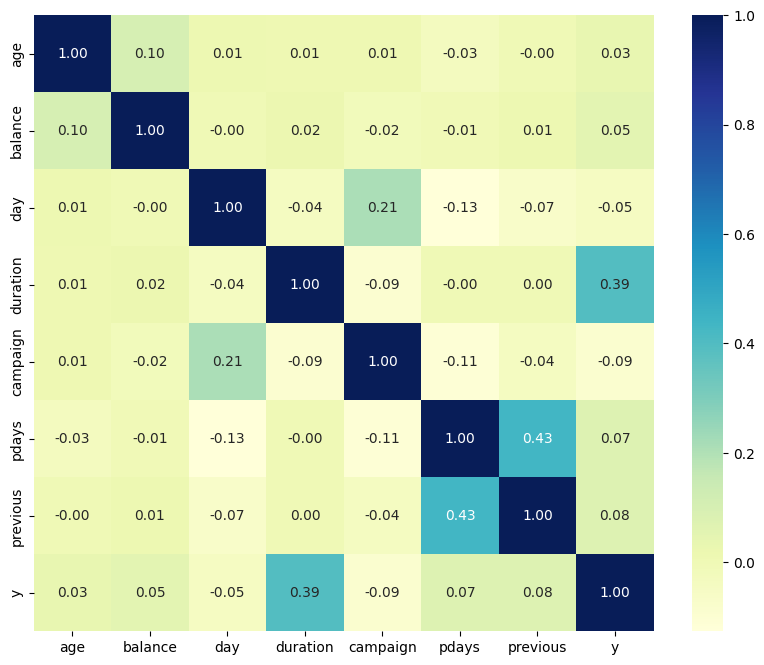

In [750]:
data1 = df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

<h4>Bivariate Analysis</h4>

JOB

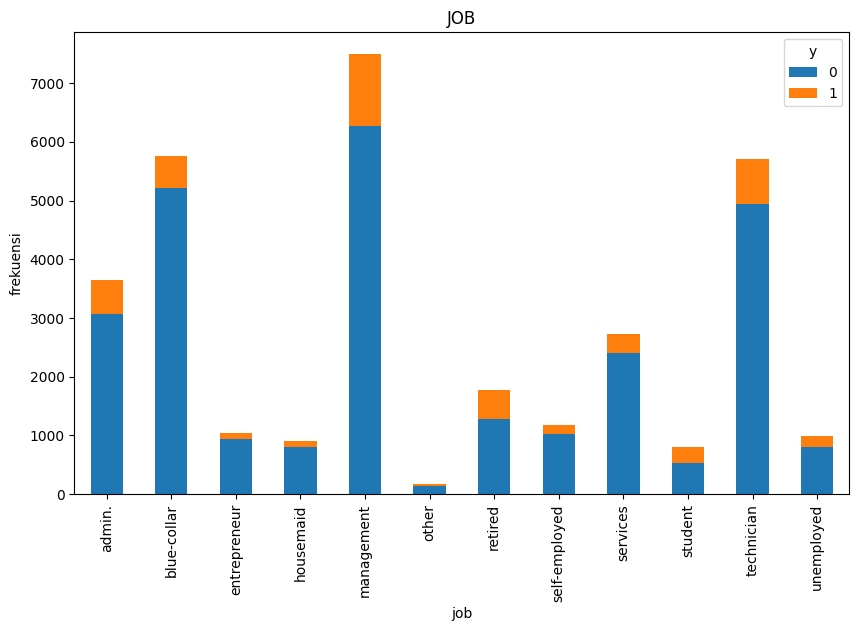

In [751]:
grouped_job = df.groupby('job')
agg_job = grouped_job['y'].value_counts().unstack()
agg_job.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('JOB')
plt.xlabel('job')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

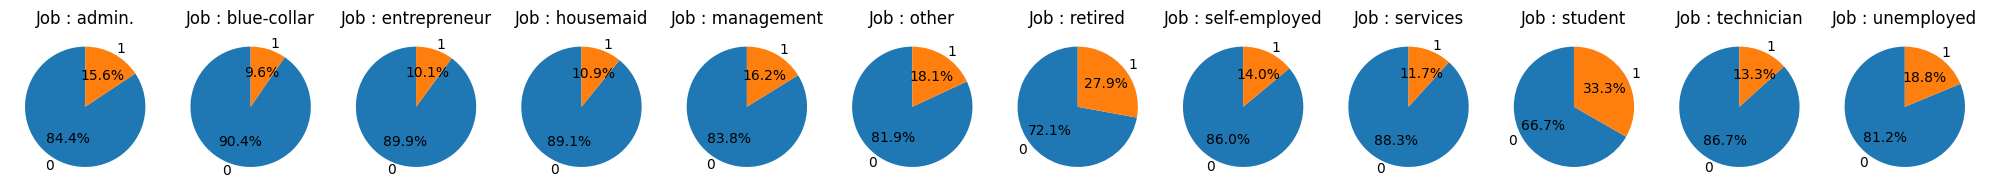

In [752]:
data_job = df.groupby('job')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_job.index), figsize=(20, 3))
for i, job_status in enumerate(data_job.index):
    data_job.loc[job_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Job : {job_status}')
plt.tight_layout()
plt.show()

MARITAL

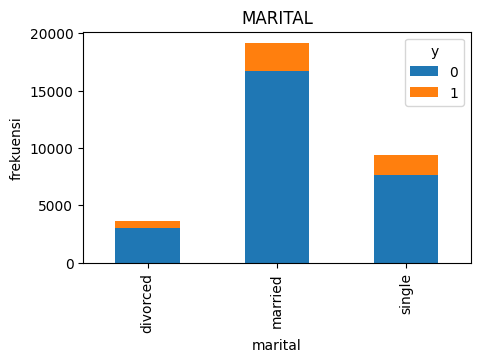

In [753]:
grouped_marital = df.groupby('marital')
agg_marital = grouped_marital['y'].value_counts().unstack()
agg_marital.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('MARITAL')
plt.xlabel('marital')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

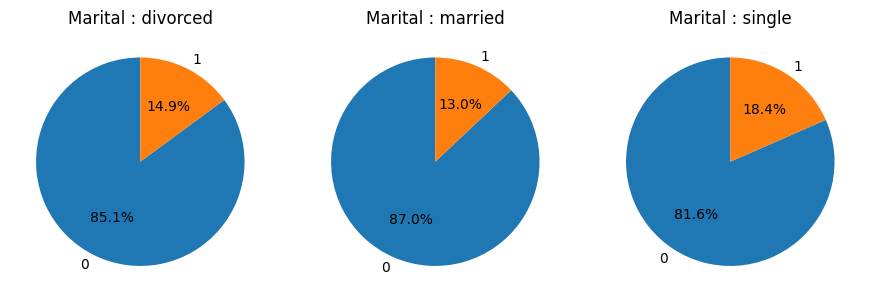

In [754]:
data_marital = df.groupby('marital')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_marital.index), figsize=(9, 3))
for i, marital_status in enumerate(data_marital.index):
    data_marital.loc[marital_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Marital : {marital_status}')
plt.tight_layout()
plt.show()

EDUCATION

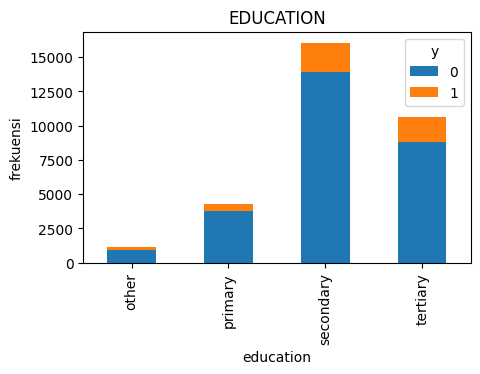

In [755]:
grouped_education = df.groupby('education')
agg_education = grouped_education['y'].value_counts().unstack()
agg_education.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('EDUCATION')
plt.xlabel('education')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

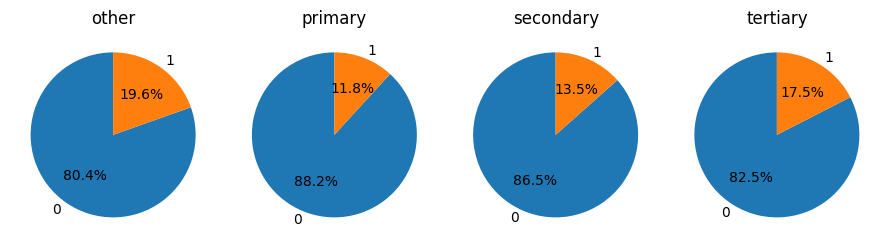

In [756]:
data_education = df.groupby('education')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_education.index), figsize=(9, 3))
for i, education_status in enumerate(data_education.index):
    data_education.loc[education_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'{education_status}')
plt.tight_layout()
plt.show()

DEFAULT

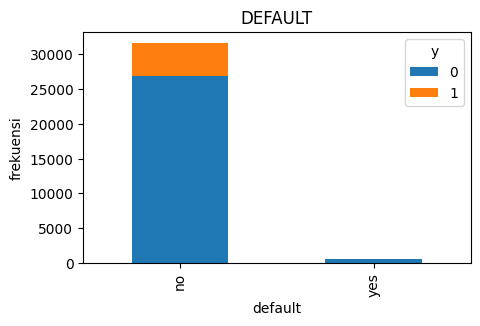

In [757]:
grouped_default = df.groupby('default')
agg_default = grouped_default['y'].value_counts().unstack()
agg_default.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('DEFAULT')
plt.xlabel('default')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

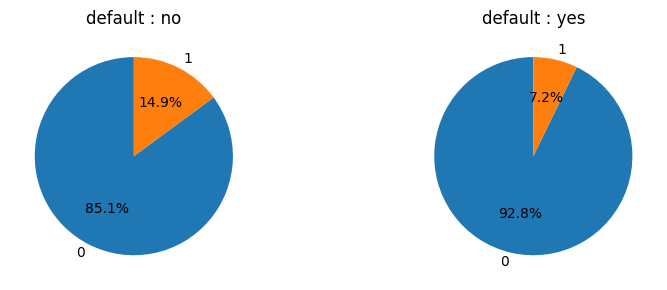

In [758]:
data_default = df.groupby('default')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_default.index), figsize=(9, 3))
for i, default_status in enumerate(data_default.index):
    data_default.loc[default_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'default : {default_status}')
plt.tight_layout()
plt.show()

HOUSING

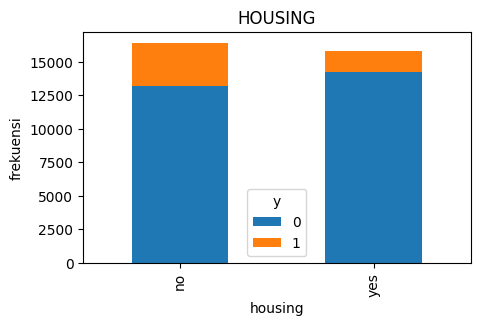

In [759]:
grouped_housing = df.groupby('housing')
agg_housing = grouped_housing['y'].value_counts().unstack()
agg_housing.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('HOUSING')
plt.xlabel('housing')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

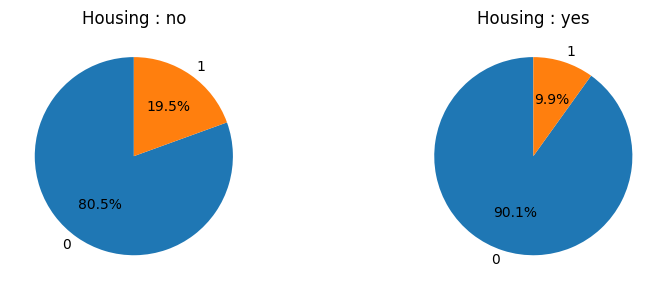

In [760]:
data_housing = df.groupby('housing')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_housing.index), figsize=(9, 3))
for i, housing_status in enumerate(data_housing.index):
    data_housing.loc[housing_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Housing : {housing_status}')
plt.tight_layout()
plt.show()

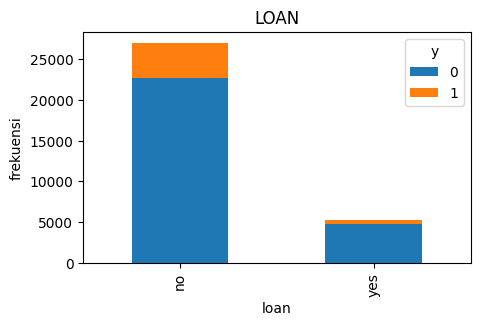

In [761]:
grouped_loan = df.groupby('loan')
agg_loan = grouped_loan['y'].value_counts().unstack()
agg_loan.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('LOAN')
plt.xlabel('loan')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

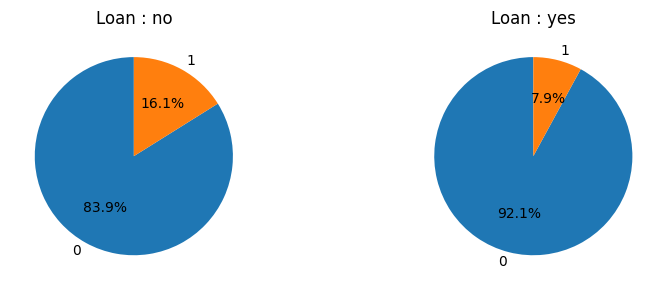

In [762]:
data_loan = df.groupby('loan')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_loan.index), figsize=(9, 3))
for i, loan_status in enumerate(data_loan.index):
    data_loan.loc[loan_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Loan : {loan_status}')
plt.tight_layout()
plt.show()

CONTACT

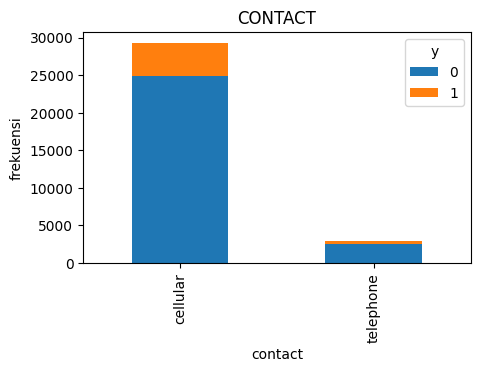

In [763]:
grouped_contact = df.groupby('contact')
agg_contact = grouped_contact['y'].value_counts().unstack()
agg_contact.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('CONTACT')
plt.xlabel('contact')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

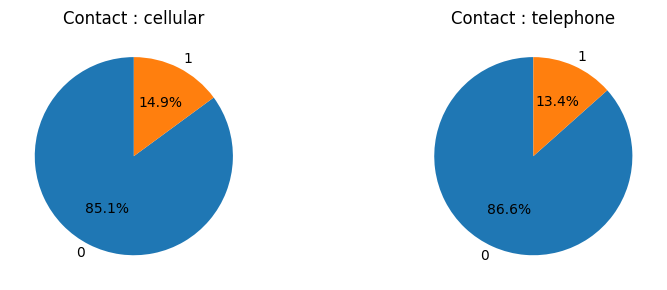

In [764]:
data_contact = df.groupby('contact')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_contact.index), figsize=(9, 3))
for i, contact_status in enumerate(data_contact.index):
    data_contact.loc[contact_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Contact : {contact_status}')
plt.tight_layout()
plt.show()

In [765]:
contingency_table = pd.crosstab(df['contact'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat korelasi yang signifikan antara 'contact' dan 'y'.")
else:
    print("Tidak terdapat korelasi yang signifikan antara 'contact' dan 'y'.")

Chi-Square statistic: 4.593240338277887
P-value: 0.03209827633501861
Terdapat korelasi yang signifikan antara 'contact' dan 'y'.


MONTH

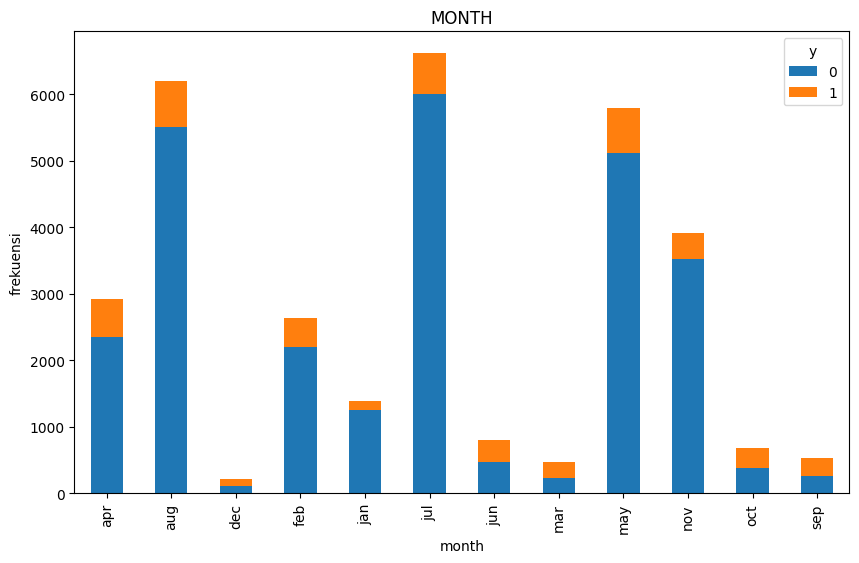

In [766]:
grouped_month = df.groupby('month')
agg_month = grouped_month['y'].value_counts().unstack()
agg_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('MONTH')
plt.xlabel('month')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

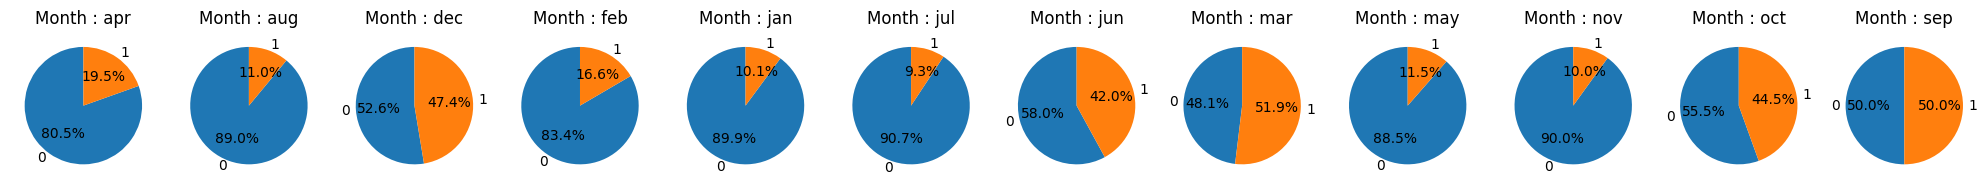

In [767]:
data_month = df.groupby('month')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_month.index), figsize=(20, 3))
for i, month_status in enumerate(data_month.index):
    data_month.loc[month_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Month : {month_status}')
plt.tight_layout()
plt.show()

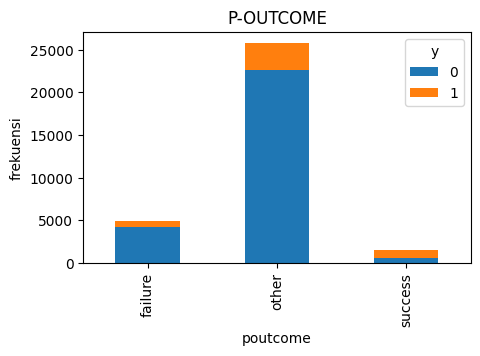

In [768]:
grouped_poutcome = df.groupby('poutcome')
agg_poutcome = grouped_poutcome['y'].value_counts().unstack()
agg_poutcome.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('P-OUTCOME')
plt.xlabel('poutcome')
plt.ylabel('frekuensi')
plt.legend(title='y')
plt.show()

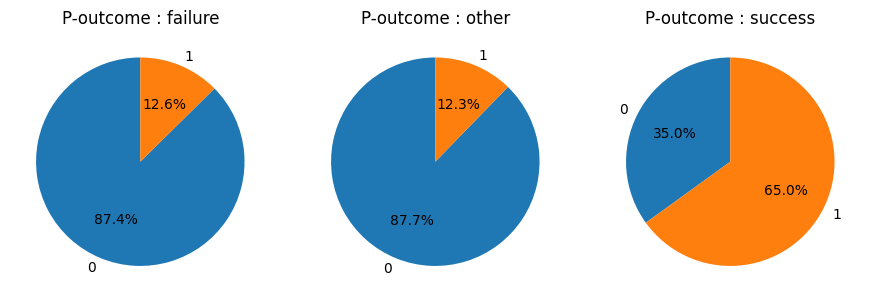

In [769]:
data_poutcome = df.groupby('poutcome')['y'].value_counts().unstack()
fig, axes = plt.subplots(nrows=1, ncols=len(data_poutcome.index), figsize=(9, 3))
for i, poutcome_status in enumerate(data_poutcome.index):
    data_poutcome.loc[poutcome_status].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'P-outcome : {poutcome_status}')
plt.tight_layout()
plt.show()

In [770]:
# features = numericals

# num_plots = len(features)
# num_cols = 4
# num_rows = math.ceil(num_plots / num_cols)

# plt.figure(figsize=(num_cols * 5, num_rows * 5))
# sns.pairplot(df, diag_kind='kde', hue='y')

# plt.show()

Bivariate dan multivariate analysis juga dilakukan di Tableau. Untuk mengakses [klik disini](https://public.tableau.com/app/profile/adi.nugraha/viz/Stage1-FinalProjectRakaminDS43/Q20?publish=yes).

# Feature Transformation

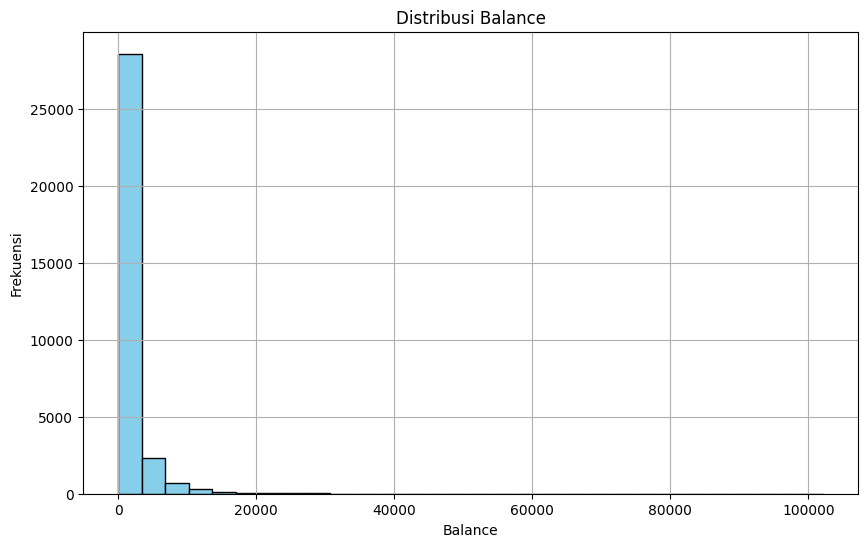

count     32191.000000
mean       1479.372992
std        3171.065863
min           0.000000
25%         139.000000
50%         505.000000
75%        1523.000000
max      102127.000000
Name: balance, dtype: float64


In [771]:
plt.figure(figsize=(10, 6))
plt.hist(df['balance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Balance')
plt.xlabel('Balance')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

summary_stats = df['balance'].describe()
print(summary_stats)

In [772]:
negative_balance = df[df['balance'] < 0]

print(negative_balance)

num_negative_balance = negative_balance.shape[0]
print(f"Jumlah baris dengan nilai balance negatif: {num_negative_balance}")

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
Jumlah baris dengan nilai balance negatif: 0


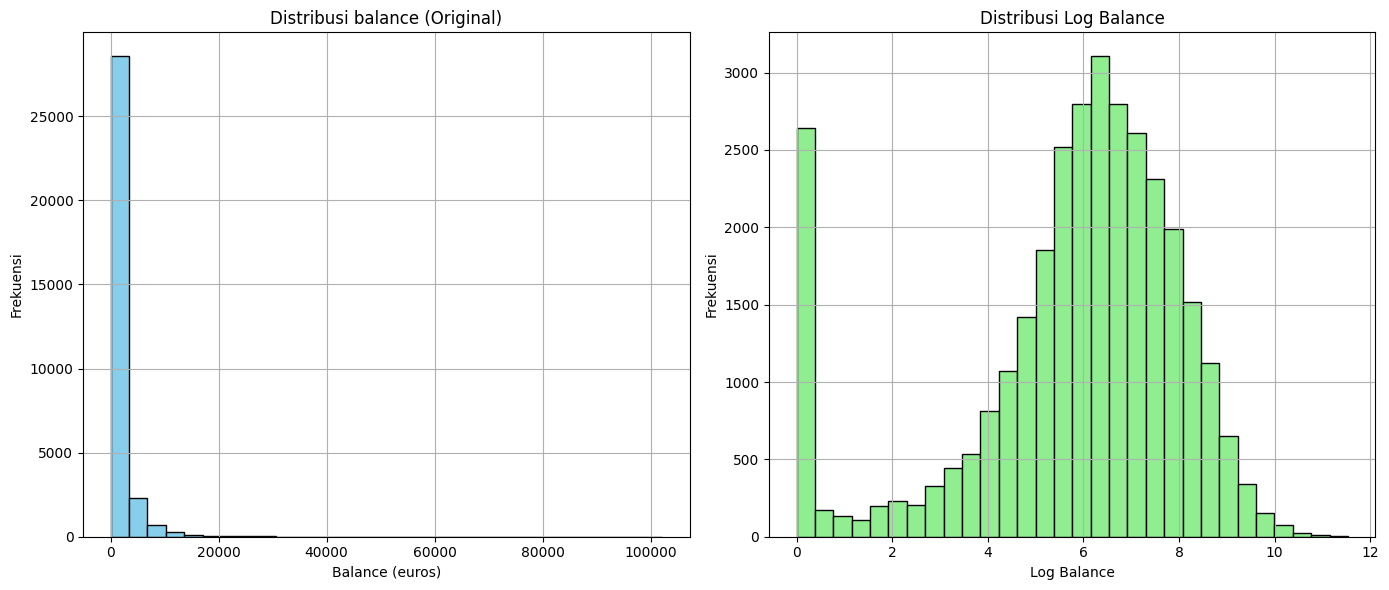

In [773]:
df['balance'] = df['balance'] + 1

df['log_balance'] = np.log(df['balance'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['balance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi balance (Original)')
plt.xlabel('Balance (euros)')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['log_balance'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Log Balance')
plt.xlabel('Log Balance')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.tight_layout()
plt.show()

In [774]:
df[['balance', 'log_balance']].describe()

,balance,log_balance
count,32191.000000,32191.000000
mean,1480.372992,5.759925
std,3171.065863,2.361897
min,1.000000,0.000000
25%,140.000000,4.941642
50%,506.000000,6.226537
75%,1524.000000,7.329094
max,102128.000000,11.533982


In [775]:
df.sample(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,log_balance
33646,48,admin.,single,secondary,no,875,yes,no,cellular,20,apr,243,2,151,7,other,0,6.774224
44248,24,admin.,single,secondary,no,1056,no,no,cellular,21,jul,338,1,-1,0,other,0,6.962243
20763,56,services,married,secondary,no,1,no,no,cellular,13,aug,112,4,-1,0,other,0,0.000000
38930,38,blue-collar,single,primary,no,379,yes,no,cellular,18,may,169,1,-1,0,other,0,5.937536
18595,49,management,married,tertiary,no,414,no,yes,cellular,31,jul,196,4,-1,0,other,0,6.025866
44849,70,retired,married,primary,no,3783,no,no,cellular,22,sep,704,2,190,1,failure,0,8.238273
21231,54,blue-collar,married,secondary,no,11,yes,no,cellular,18,aug,195,4,-1,0,other,0,2.397895
17811,47,entrepreneur,divorced,secondary,no,3,yes,yes,cellular,29,jul,104,4,-1,0,other,0,1.098612
17259,26,blue-collar,single,primary,no,1539,no,yes,cellular,28,jul,97,3,-1,0,other,0,7.338888
24926,49,management,married,tertiary,no,1051,yes,no,cellular,18,nov,924,1,-1,0,other,1,6.957497


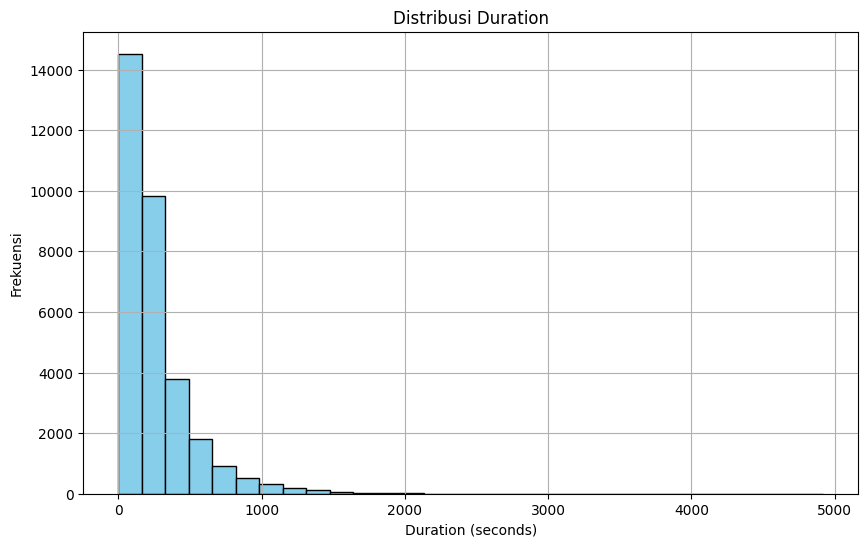

In [776]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [777]:
negative_or_zero_duration = df[df['duration'] <= 0]

print(negative_or_zero_duration)

num_negative_or_zero_duration = negative_or_zero_duration.shape[0]
print(f"Jumlah baris dengan nilai duration negatif atau nol: {num_negative_or_zero_duration}")

       age           job  marital  education default  balance housing loan  \
22937   35    technician  married  secondary      no     5536      no   no   
36425   31  entrepreneur  married  secondary      no      163     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome  y  \
22937  cellular   26   aug         0        15     -1         0    other  0   
36425  cellular   11   may         0         2     -1         0    other  0   

       log_balance  
22937     8.619027  
36425     5.093750  
Jumlah baris dengan nilai duration negatif atau nol: 2


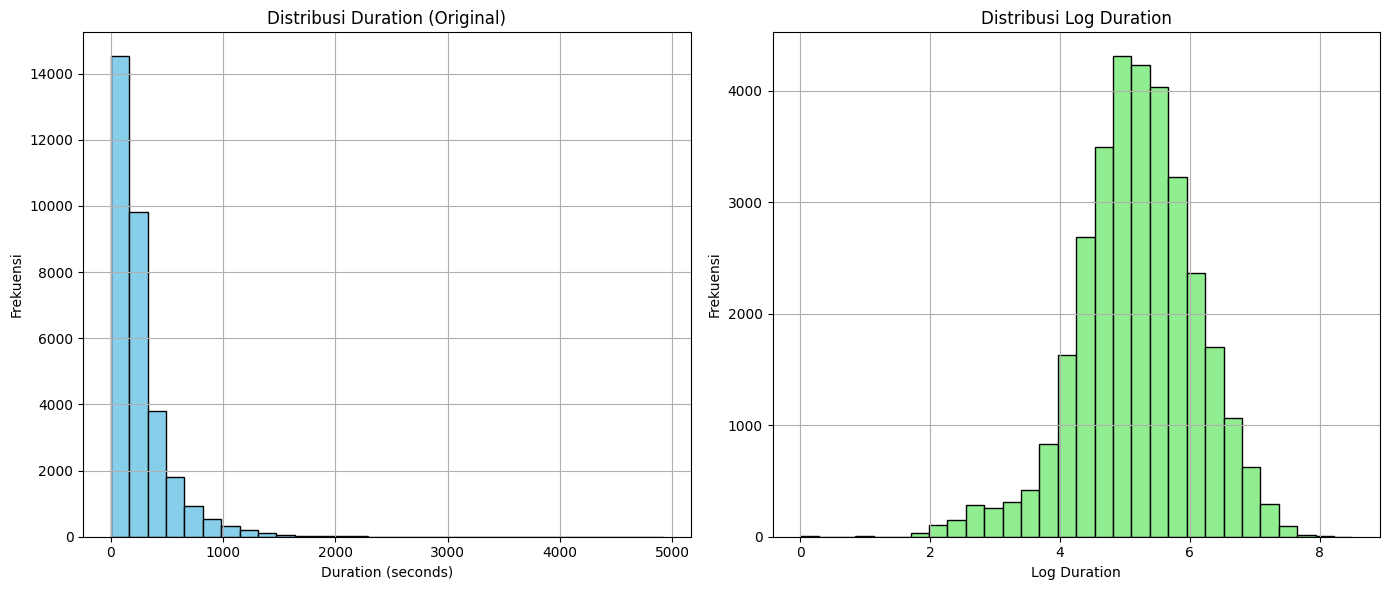

In [778]:
df['duration'] = df['duration'] + 1

df['log_duration'] = np.log(df['duration'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Duration (Original)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['log_duration'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Log Duration')
plt.xlabel('Log Duration')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.tight_layout()
plt.show()

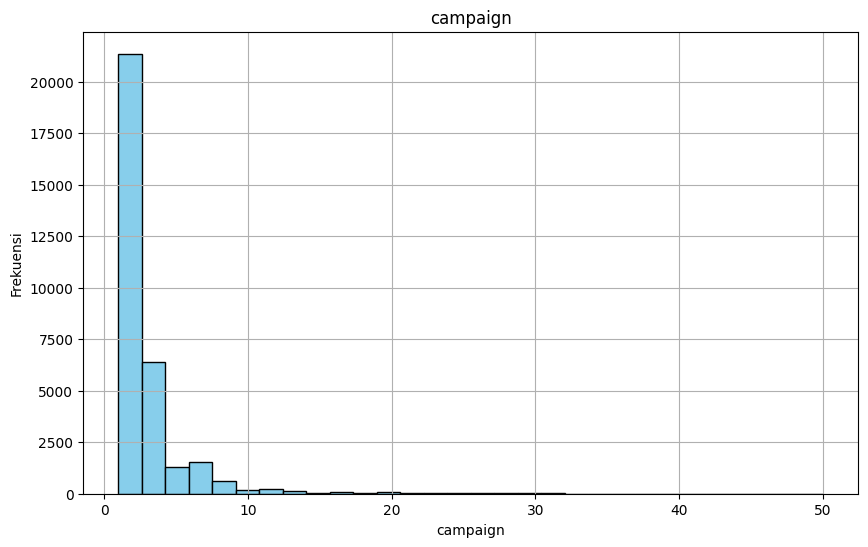

In [779]:
plt.figure(figsize=(10, 6))
plt.hist(df['campaign'], bins=30, color='skyblue', edgecolor='black')
plt.title('campaign')
plt.xlabel('campaign')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [780]:
negative_or_zero_campaign = df[df['campaign'] <= 0]

print(negative_or_zero_campaign)

num_negative_or_zero_campaign = negative_or_zero_campaign.shape[0]
print(f"Jumlah baris dengan nilai campaign negatif atau nol: {num_negative_or_zero_campaign}")

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y, log_balance, log_duration]
Index: []
Jumlah baris dengan nilai campaign negatif atau nol: 0


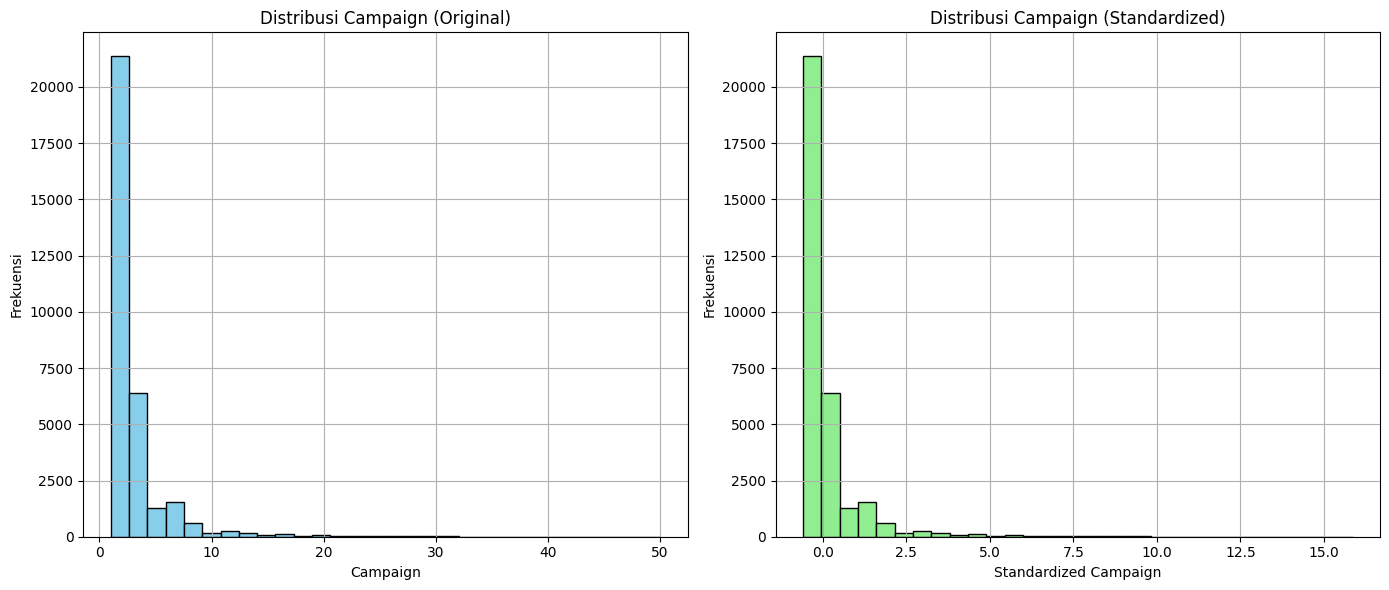

In [781]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['campaign_standardized'] = scaler.fit_transform(df[['campaign']])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['campaign'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Campaign (Original)')
plt.xlabel('Campaign')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['campaign_standardized'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Campaign (Standardized)')
plt.xlabel('Standardized Campaign')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.tight_layout()
plt.show()

In [782]:
 df[['balance', 'log_balance']].describe()

,balance,log_balance
count,32191.000000,32191.000000
mean,1480.372992,5.759925
std,3171.065863,2.361897
min,1.000000,0.000000
25%,140.000000,4.941642
50%,506.000000,6.226537
75%,1524.000000,7.329094
max,102128.000000,11.533982


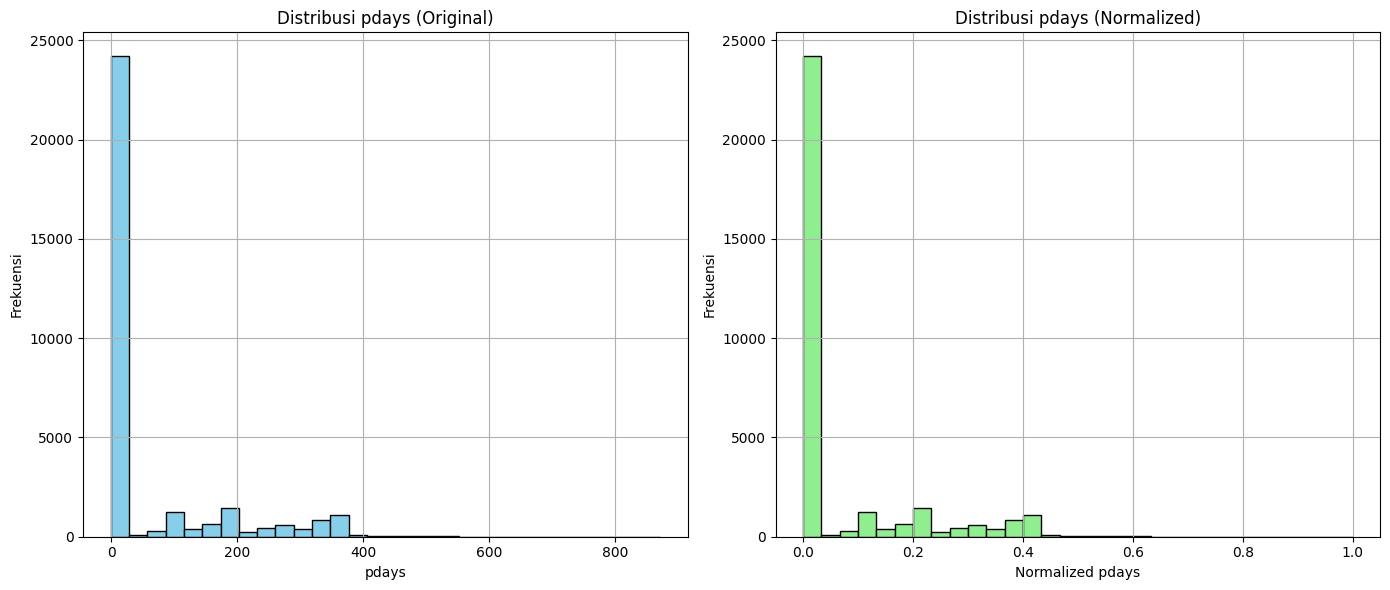

In [783]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['pdays_normalized'] = scaler.fit_transform(df[['pdays']])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['pdays'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi pdays (Original)')
plt.xlabel('pdays')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['pdays_normalized'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi pdays (Normalized)')
plt.xlabel('Normalized pdays')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.tight_layout()
plt.show()

In [784]:
negative_or_zero_previous = df[df['previous'] <= 0]

print(negative_or_zero_previous)

num_negative_or_zero_previous = negative_or_zero_previous.shape[0]
print(f"Jumlah baris dengan nilai previous negatif atau nol: {num_negative_or_zero_previous}")

       age          job   marital  education default  balance housing loan  \
12657   27   management    single  secondary      no       36      no   no   
12658   54  blue-collar   married    primary      no      467      no   no   
12659   43  blue-collar   married  secondary      no      106      no  yes   
12660   31   technician    single  secondary      no       20      no   no   
12661   27   technician    single  secondary      no      127     yes  yes   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45203   23      student    single   tertiary      no      114      no   no   
45205   25   technician    single  secondary      no      506      no  yes   
45206   51   technician   married   tertiary      no      826      no   no   
45207   71      retired  divorced    primary      no     1730      no   no   
45209   57  blue-collar   married  secondary      no      669      no   no   

         contact  day  ... duration  campaign  pdays  previous 

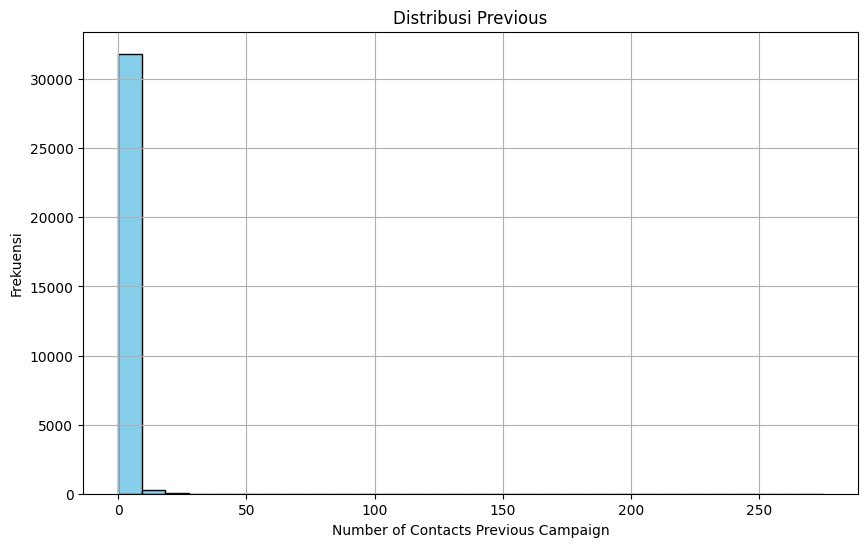

In [785]:
plt.figure(figsize=(10, 6))
plt.hist(df['previous'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Previous')
plt.xlabel('Number of Contacts Previous Campaign')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

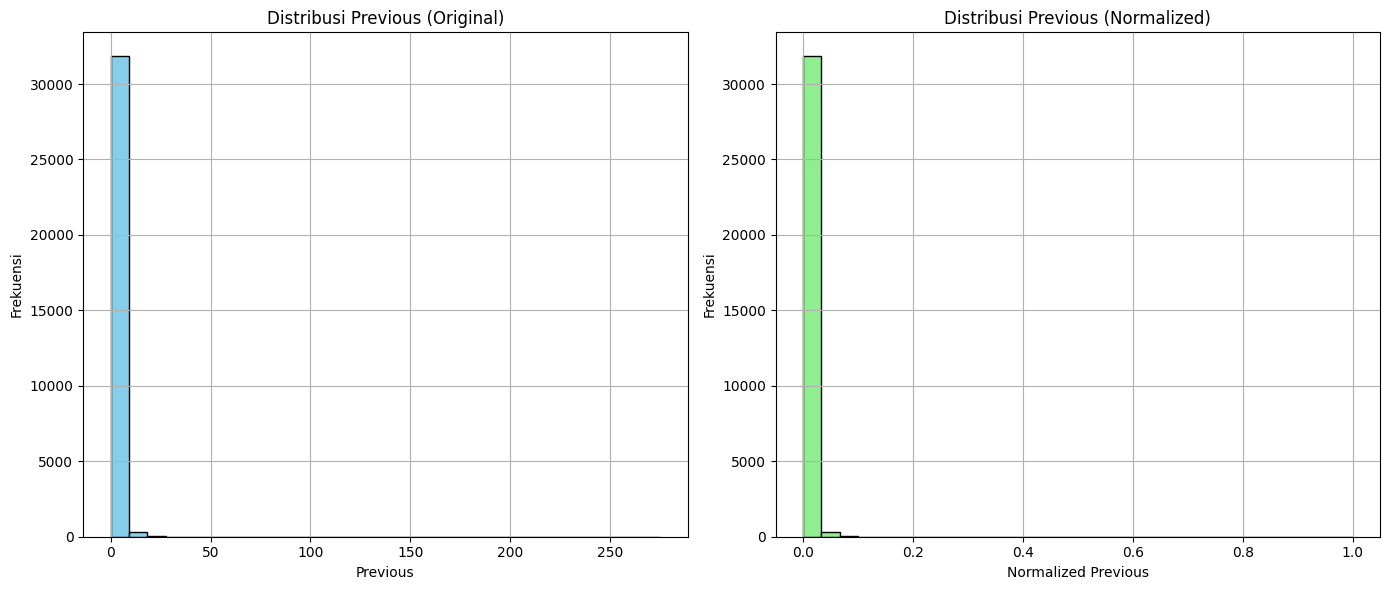

In [786]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['previous_normalized'] = scaler.fit_transform(df[['previous']])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['previous'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Previous (Original)')
plt.xlabel('Previous')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['previous_normalized'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Previous (Normalized)')
plt.xlabel('Normalized Previous')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.tight_layout()
plt.show()

In [787]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y,log_balance,log_duration,campaign_standardized,pdays_normalized,previous_normalized
count,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,3.219100e+04,32191.000000,32191.000000
mean,41.072163,1480.372992,15.986922,261.518095,2.754279,55.930726,0.806157,0.147836,5.759925,5.189425,-1.412654e-17,0.065288,0.002931
std,11.057405,3171.065863,8.261942,257.138529,2.980085,112.623239,2.678185,0.354943,2.361897,0.904323,1.000016e+00,0.129155,0.009739
min,18.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-5.886767e-01,0.000000,0.000000
25%,32.000000,140.000000,9.000000,105.000000,1.000000,-1.000000,0.000000,0.000000,4.941642,4.653960,-5.886767e-01,0.000000,0.000000
50%,39.000000,506.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000,6.226537,5.204007,-2.531105e-01,0.000000,0.000000
75%,49.000000,1524.000000,21.000000,323.000000,3.000000,13.500000,1.000000,0.000000,7.329094,5.777652,8.245560e-02,0.016628,0.003636
max,95.000000,102128.000000,31.000000,4919.000000,50.000000,871.000000,275.000000,1.000000,11.533982,8.500861,1.585406e+01,1.000000,1.000000


# UJI STATISTIK

In [788]:
#mengubah y menjadi numeric
df['y'] = df['y'].replace({"yes": 1 , "no": 0})

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['job'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'job' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'job' dan 'y'.")

Chi-Square statistic: 671.0968774060117
P-value: 8.434364171924581e-137
Terdapat hubungan yang signifikan antara 'job' dan 'y'.


In [789]:
contingency_table = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'marital' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'marital' dan 'y'.")

Chi-Square statistic: 148.9122999763589
P-value: 4.614290326039398e-33
Terdapat hubungan yang signifikan antara 'marital' dan 'y'.


In [790]:
contingency_table = pd.crosstab(df['education'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'education' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'education' dan 'y'.")

Chi-Square statistic: 134.79878742192977
P-value: 4.9978701951818713e-29
Terdapat hubungan yang signifikan antara 'education' dan 'y'.


In [791]:
contingency_table = pd.crosstab(df['default'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'default' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'default' dan 'y'.")

Chi-Square statistic: 23.64874406768449
P-value: 1.156213450673632e-06
Terdapat hubungan yang signifikan antara 'default' dan 'y'.


In [792]:
contingency_table = pd.crosstab(df['housing'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'housing' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'housing' dan 'y'.")

Chi-Square statistic: 582.4827766750709
P-value: 1.0815042783301815e-128
Terdapat hubungan yang signifikan antara 'housing' dan 'y'.


In [793]:
contingency_table = pd.crosstab(df['loan'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'loan' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'loan' dan 'y'.")

Chi-Square statistic: 230.3330416367599
P-value: 5.043267240725434e-52
Terdapat hubungan yang signifikan antara 'loan' dan 'y'.


In [794]:
contingency_table = pd.crosstab(df['contact'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'contact' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'contact' dan 'y'.")

Chi-Square statistic: 4.593240338277887
P-value: 0.03209827633501861
Terdapat hubungan yang signifikan antara 'contact' dan 'y'.


In [795]:
contingency_table = pd.crosstab(df['month'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'month' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'month' dan 'y'.")

Chi-Square statistic: 2608.289802976031
P-value: 0.0
Terdapat hubungan yang signifikan antara 'month' dan 'y'.


In [796]:
contingency_table = pd.crosstab(df['poutcome'], df['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara 'poutcome' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'poutcome' dan 'y'.")

Chi-Square statistic: 3152.7979662198745
P-value: 0.0
Terdapat hubungan yang signifikan antara 'poutcome' dan 'y'.


In [797]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_p_value = spearmanr(df['age'], df['y'])
print(f"Korelasi Spearman antara age dan y: {spearman_corr}")
if spearman_p_value < 0.05:
    print("Terdapat hubungan yang signifikan antara 'age' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'age' dan 'y'.")

Korelasi Spearman antara age dan y: -0.004633912181053139
Tidak terdapat hubungan yang signifikan antara 'age' dan 'y'.


In [798]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_p_value = spearmanr(df['balance'], df['y'])
print(f"Korelasi Spearman antara balance dan y: {spearman_corr}")
if spearman_p_value < 0.05:
    print("Terdapat hubungan yang signifikan antara 'balance' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'balance' dan 'y'.")

Korelasi Spearman antara balance dan y: 0.1006592237616484
Terdapat hubungan yang signifikan antara 'balance' dan 'y'.


In [799]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_p_value = spearmanr(df['campaign'], df['y'])
print(f"Korelasi Spearman antara campaign dan y: {spearman_corr}")
if spearman_p_value < 0.05:
    print("Terdapat hubungan yang signifikan antara 'campaign' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'campaign' dan 'y'.")

Korelasi Spearman antara campaign dan y: -0.105864633458943
Terdapat hubungan yang signifikan antara 'campaign' dan 'y'.


In [800]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_p_value = spearmanr(df['pdays'], df['y'])
print(f"Korelasi Spearman antara pdays dan y: {spearman_corr}")
if spearman_p_value < 0.05:
    print("Terdapat hubungan yang signifikan antara 'pdays' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'pdays' dan 'y'.")

Korelasi Spearman antara pdays dan y: 0.11650892537390797
Terdapat hubungan yang signifikan antara 'pdays' dan 'y'.


In [801]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_p_value = spearmanr(df['previous'], df['y'])
print(f"Korelasi Spearman antara previous dan y: {spearman_corr}")
if spearman_p_value < 0.05:
    print("Terdapat hubungan yang signifikan antara 'previous' dan 'y'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'previous' dan 'y'.")

Korelasi Spearman antara previous dan y: 0.1401387850610609
Terdapat hubungan yang signifikan antara 'previous' dan 'y'.


# Feature Encoding

In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32191 entries, 12657 to 45210
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32191 non-null  int64  
 1   job                    32191 non-null  object 
 2   marital                32191 non-null  object 
 3   education              32191 non-null  object 
 4   default                32191 non-null  object 
 5   balance                32191 non-null  int64  
 6   housing                32191 non-null  object 
 7   loan                   32191 non-null  object 
 8   contact                32191 non-null  object 
 9   day                    32191 non-null  int64  
 10  month                  32191 non-null  object 
 11  duration               32191 non-null  int64  
 12  campaign               32191 non-null  int64  
 13  pdays                  32191 non-null  int64  
 14  previous               32191 non-null  int64  
 15  pou

In [803]:
print(df["default"].value_counts())
print(df["housing"].value_counts())
print(df["loan"].value_counts())
print(df["y"].value_counts())

default
no     31665
yes      526
Name: count, dtype: int64
housing
no     16418
yes    15773
Name: count, dtype: int64
loan
no     26979
yes     5212
Name: count, dtype: int64
y
0    27432
1     4759
Name: count, dtype: int64


In [804]:
print(df["poutcome"].value_counts())
print(df["job"].value_counts())
print(df["education"].value_counts())
print(df["contact"].value_counts())
print(df["month"].value_counts())

poutcome
other      25822
failure     4870
success     1499
Name: count, dtype: int64
job
management       7492
blue-collar      5767
technician       5702
admin.           3643
services         2726
retired          1775
self-employed    1182
entrepreneur     1041
unemployed        991
housemaid         899
student           796
other             177
Name: count, dtype: int64
education
secondary    16053
tertiary     10668
primary       4290
other         1180
Name: count, dtype: int64
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
month
jul    6619
aug    6196
may    5791
nov    3919
apr    2926
feb    2636
jan    1394
jun     809
oct     688
sep     532
mar     470
dec     211
Name: count, dtype: int64


In [805]:
#Label Encoding
#konversi yes/no menjadi 1/0
df['default'] = df['default'].replace({"yes": 1 , "no": 0})
df['housing'] = df['housing'].replace({"yes": 1 , "no": 0})
df['loan'] = df['loan'].replace({"yes": 1 , "no": 0})

#labelling month
df['month'] = df['month'].replace({"jan": 1, "feb": 2, "mar" : 3, "apr": 4 ,
                                   "may": 5, "jun": 6, "jul": 7 , "aug": 8,
                                   "sep": 9, "oct": 10, "nov": 11 , "dec": 12})

#labelling contact
df['contact'] = df['contact'].replace({"cellular": 1 , "telephone": 0})

#One Hot Encoding
df = pd.get_dummies(df, columns=["job", "marital", "poutcome", "education"], dtype = int )

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32191 entries, 12657 to 45210
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32191 non-null  int64  
 1   default                32191 non-null  int64  
 2   balance                32191 non-null  int64  
 3   housing                32191 non-null  int64  
 4   loan                   32191 non-null  int64  
 5   contact                32191 non-null  int64  
 6   day                    32191 non-null  int64  
 7   month                  32191 non-null  int64  
 8   duration               32191 non-null  int64  
 9   campaign               32191 non-null  int64  
 10  pdays                  32191 non-null  int64  
 11  previous               32191 non-null  int64  
 12  y                      32191 non-null  int64  
 13  log_balance            32191 non-null  float64
 14  log_duration           32191 non-null  float64
 15  cam

# Handle Class Imbalance

In [807]:
df['y'].value_counts()

y
0    27432
1     4759
Name: count, dtype: int64

In [808]:
df1 = df.copy()

In [809]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32191 entries, 12657 to 45210
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32191 non-null  int64  
 1   default                32191 non-null  int64  
 2   balance                32191 non-null  int64  
 3   housing                32191 non-null  int64  
 4   loan                   32191 non-null  int64  
 5   contact                32191 non-null  int64  
 6   day                    32191 non-null  int64  
 7   month                  32191 non-null  int64  
 8   duration               32191 non-null  int64  
 9   campaign               32191 non-null  int64  
 10  pdays                  32191 non-null  int64  
 11  previous               32191 non-null  int64  
 12  y                      32191 non-null  int64  
 13  log_balance            32191 non-null  float64
 14  log_duration           32191 non-null  float64
 15  cam

In [810]:
X = df1[[col for col in df1.columns if col not in ['age', 'default', 'balance', 'housing','loan','contact','day','month','duration','campaign','pdays','previous']]].values
y = df1['y'].values

print(X.shape)
print(y.shape)

(32191, 28)
(32191,)


In [811]:
from imblearn import over_sampling

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [812]:
print(pd.DataFrame(y_over_SMOTE).value_counts())

0    27432
1    27432
Name: count, dtype: int64


# Feature Engineering

## Feature Extraction

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32191 entries, 12657 to 45210
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32191 non-null  int64  
 1   default                32191 non-null  int64  
 2   balance                32191 non-null  int64  
 3   housing                32191 non-null  int64  
 4   loan                   32191 non-null  int64  
 5   contact                32191 non-null  int64  
 6   day                    32191 non-null  int64  
 7   month                  32191 non-null  int64  
 8   duration               32191 non-null  int64  
 9   campaign               32191 non-null  int64  
 10  pdays                  32191 non-null  int64  
 11  previous               32191 non-null  int64  
 12  y                      32191 non-null  int64  
 13  log_balance            32191 non-null  float64
 14  log_duration           32191 non-null  float64
 15  cam

In [816]:
# 1. Rasio antara Balance dengan Campaign
df['balance_campaign_ratio'] = df['balance'] / df['campaign']

# 2. Pengelompokan Umur
def age_group(age):
    if age < 30:
        return '0' #0 maksudnya adalah umur yang dikategorikan sebagai young
    elif age <= 60:
        return '1' #1 maksudnya adalah kategori umur middle age
    else:
        return '2' #2 maksudnya adalah kategori umur old

df['age_group'] = df['age'].apply(age_group)

# 3. Pengelompokan Customer yang Pernah Dihubungi
def contact_group(pdays):
    if pdays == -1:
        return '0' #0 maksudnya adalah customer yang tidak pernah dihubungi pada campaign sebelumnya
    else:
        return '1' #1 maksudnya adalah customer yang pernah dihubungi pada campaign sebelumnya

df['contact_group'] = df['pdays'].apply(contact_group)

# 4. Pengelompokan day menjadi week
def week(day):
    if day <= 7:
        return '1' #hari ke 1 sampai ke 7 di kategorikan sebagai week 1
    elif day <= 14:
        return '2' #hari ke 8 sampai ke 14 di kategorikan sebagai week 2
    elif day <= 21:
        return '3' #hari ke 14 sampai ke 21 di kategorikan sebagai week 3
    elif day <= 28:
        return '4' #hari ke 21 sampai ke 28 di kategorikan sebagai week 4
    else:
        return '5' #hari ke 29 sampai ke 31 di kategorikan sebagai week 5

df['week'] = df['day'].apply(week)

## Feature Selection

In [817]:
# Menghapus kolom - kolom yang sudah tidak digunakan
df = df.drop(columns=['duration']) # Kolom duration dihapus karena duration muncul setelah campaign tersebut dijalankan
df = df.drop(columns=['previous'])
df = df.drop(columns=['balance'])
df = df.drop(columns=['campaign'])
df = df.drop(columns=['pdays'])
df = df.drop(columns=['day'])

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32191 entries, 12657 to 45210
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32191 non-null  int64  
 1   default                 32191 non-null  int64  
 2   housing                 32191 non-null  int64  
 3   loan                    32191 non-null  int64  
 4   contact                 32191 non-null  int64  
 5   month                   32191 non-null  int64  
 6   y                       32191 non-null  int64  
 7   log_balance             32191 non-null  float64
 8   log_duration            32191 non-null  float64
 9   campaign_standardized   32191 non-null  float64
 10  pdays_normalized        32191 non-null  float64
 11  previous_normalized     32191 non-null  float64
 12  job_admin.              32191 non-null  int64  
 13  job_blue-collar         32191 non-null  int64  
 14  job_entrepreneur        32191 non-null 

##3. Git

<h4>A. Buat Repository Git</h4>

In [819]:
from google.colab import files
file = files.upload()

Saving Github.png to Github (3).png


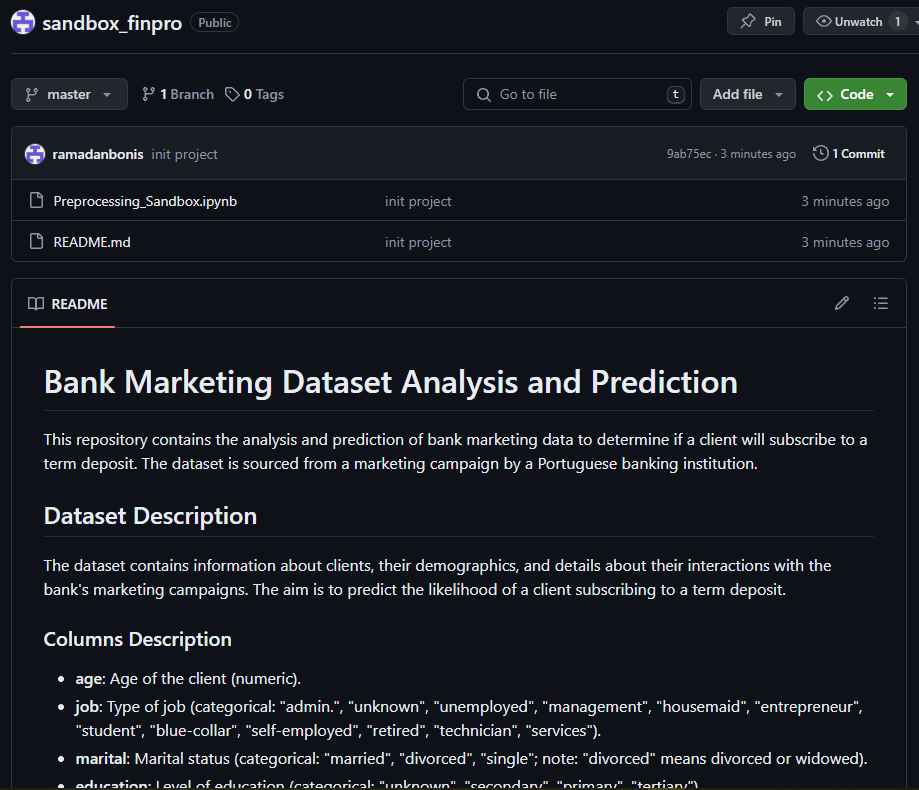

In [820]:
from PIL import Image
import IPython.display as display

image_path = list(file.keys())[0]
image = Image.open(image_path)
display.display(image)

<h4>B. Upload File Notebook pada Repository</h4>

Link repository sandbox_finpro: https://github.com/ramadanbonis/sandbox_finpro